Generando dataset...
  Procesando función: Sphere
    Determinando el mejor algoritmo base para esta función...
    Mejor algoritmo para Sphere: TLBO
      ... 25/250 muestras generadas.
      ... 50/250 muestras generadas.
      ... 75/250 muestras generadas.
      ... 100/250 muestras generadas.
      ... 125/250 muestras generadas.
      ... 150/250 muestras generadas.
      ... 175/250 muestras generadas.
      ... 200/250 muestras generadas.
      ... 225/250 muestras generadas.
      ... 250/250 muestras generadas.
  Procesando función: Rastrigin
    Determinando el mejor algoritmo base para esta función...
    Mejor algoritmo para Rastrigin: PSO
      ... 25/250 muestras generadas.
      ... 50/250 muestras generadas.
      ... 75/250 muestras generadas.
      ... 100/250 muestras generadas.
      ... 125/250 muestras generadas.
      ... 150/250 muestras generadas.
      ... 175/250 muestras generadas.
      ... 200/250 muestras generadas.
      ... 225/250 muestras generadas.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 126, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 61, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       192,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,739 (776.32 KB)

 Trainable params: 198,739 (776.32 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando la CNN 1D...
Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5150 - loss: 0.7725 - val_accuracy: 0.4667 - val_loss: 0.7035
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5781 - loss: 0.6845 - val_accuracy: 0.5267 - val_loss: 0.7116
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5615 - loss: 0.6766 - val_accuracy: 0.4800 - val_loss: 0.7204
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5821 - loss: 0.6625 - val_accuracy: 0.4800 - val_loss: 0.7126
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6215 - loss: 0.6379 - val_accuracy: 0.4933 - val_loss: 0.7217
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5818 - loss: 0.6859 - val_accuracy: 0.5200 - val_loss: 0.7426
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6138 - loss: 0.6450 - val_accuracy: 0.5000 - val_loss: 0.7219
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6921 - loss: 0.6012 -

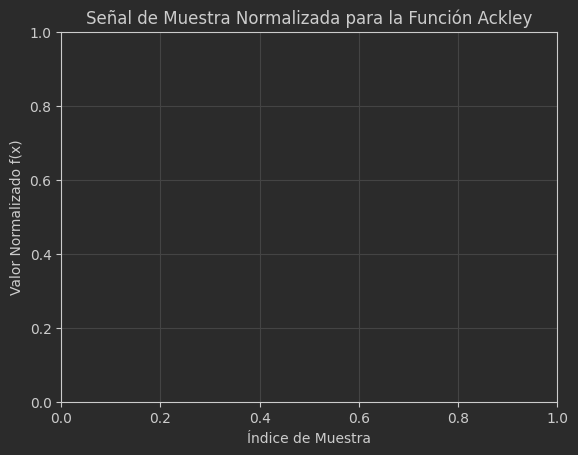

In [1]:
!pip install tensorflow numpy scikit-learn matplotlib
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import os

plt.rcParams.update({
    'figure.facecolor': '#2b2b2b',     # fondo exterior
    'axes.facecolor':   '#2b2b2b',     # fondo del área del gráfico
    'axes.edgecolor':   '#cccccc',     # borde de los ejes
    'axes.labelcolor':  '#cccccc',     # etiquetas de los ejes
    'xtick.color':      '#cccccc',     # color de los números en el eje X
    'ytick.color':      '#cccccc',     # color de los números en el eje Y
    'text.color':       '#cccccc',     # color del título y textos
    'grid.color':       '#444444',     # color de la grilla
})

# --- 1. DEFINICIÓN DE FUNCIONES BENCHMARK Y METAHEURÍSTICAS ---

def sphere_function(x):
    return np.sum(x**2)

def rastrigin_function(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def ackley_function(x):
    a, b, c = 20, 0.2, 2 * np.pi
    d = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(c * x))
    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)
    return term1 + term2 + a + np.exp(1)

def schwefel_function(x):
    # Otra función multimodal compleja para añadir variedad
    return 418.9829 * len(x) - np.sum(x * np.sin(np.sqrt(np.abs(x))))

BENCHMARK_FUNCTIONS = {
    "Sphere": {"func": sphere_function, "bounds": [-5.12, 5.12]},
    "Rastrigin": {"func": rastrigin_function, "bounds": [-5.12, 5.12]},
    "Ackley": {"func": ackley_function, "bounds": [-5, 5]},
    "Schwefel": {"func": schwefel_function, "bounds": [-500, 500]}
}

METAHEURISTICS = ["GA", "PSO", "TLBO"]
DIM = 2 # Dimensión de las funciones de prueba

# --- Implementaciones de Metaheurísticas (run_ga, run_pso, run_tlbo) ---

def run_pso(func, bounds, dim=2, pop_size=30, max_iter=50):
    w, c1, c2 = 0.5, 1.5, 1.5
    low, high = bounds
    particles_pos = np.random.uniform(low, high, (pop_size, dim))
    particles_vel = np.zeros((pop_size, dim))
    pbest_pos = np.copy(particles_pos)
    pbest_fitness = np.array([func(p) for p in pbest_pos])
    gbest_idx = np.argmin(pbest_fitness)
    gbest_pos = pbest_pos[gbest_idx]
    for _ in range(max_iter):
        r1, r2 = np.random.rand(pop_size, dim), np.random.rand(pop_size, dim)
        particles_vel = w * particles_vel + c1 * r1 * (pbest_pos - particles_pos) + c2 * r2 * (gbest_pos - particles_pos)
        particles_pos = particles_pos + particles_vel
        particles_pos = np.clip(particles_pos, low, high)
        current_fitness = np.array([func(p) for p in particles_pos])
        update_indices = current_fitness < pbest_fitness
        pbest_pos[update_indices] = particles_pos[update_indices]
        pbest_fitness[update_indices] = current_fitness[update_indices]
        gbest_idx = np.argmin(pbest_fitness)
        gbest_pos = pbest_pos[gbest_idx]
    return np.min(pbest_fitness)

def run_ga(func, bounds, dim=2, pop_size=30, max_iter=50, mutation_rate=0.1):
    low, high = bounds
    population = np.random.uniform(low, high, (pop_size, dim))
    for _ in range(max_iter):
        fitness = np.array([func(p) for p in population])
        new_population = []
        for _ in range(pop_size):
            i, j = np.random.randint(0, pop_size, 2)
            winner = i if fitness[i] < fitness[j] else j
            new_population.append(population[winner])
        population = np.array(new_population)
        for i in range(0, pop_size, 2):
            p1, p2 = population[i], population[i+1]
            alpha = np.random.rand()
            offspring1 = alpha * p1 + (1 - alpha) * p2
            offspring2 = alpha * p2 + (1 - alpha) * p1
            population[i], population[i+1] = offspring1, offspring2
        mutation_mask = np.random.rand(pop_size, dim) < mutation_rate
        mutation_values = np.random.uniform(low, high, (pop_size, dim))
        population[mutation_mask] = mutation_values[mutation_mask]
        population = np.clip(population, low, high)
    final_fitness = np.array([func(p) for p in population])
    return np.min(final_fitness)

def run_tlbo(func, bounds, dim=2, pop_size=30, max_iter=50):
    low, high = bounds
    population = np.random.uniform(low, high, (pop_size, dim))
    for _ in range(max_iter):
        fitness = np.array([func(p) for p in population])
        teacher_idx = np.argmin(fitness)
        teacher = population[teacher_idx]
        mean_pop = np.mean(population, axis=0)
        for i in range(pop_size):
            TF = np.random.randint(1, 3)
            r = np.random.rand(dim)
            new_solution = population[i] + r * (teacher - TF * mean_pop)
            new_solution = np.clip(new_solution, low, high)
            if func(new_solution) < fitness[i]:
                population[i] = new_solution
        fitness = np.array([func(p) for p in population])
        for i in range(pop_size):
            j = np.random.randint(0, pop_size)
            while i == j: j = np.random.randint(0, pop_size)
            if fitness[i] < fitness[j]:
                partner = population[i]
                other = population[j]
            else:
                partner = population[j]
                other = population[i]
            r = np.random.rand(dim)
            new_solution = population[i] + r * (partner - other)
            new_solution = np.clip(new_solution, low, high)
            if func(new_solution) < fitness[i]:
                population[i] = new_solution
    final_fitness = np.array([func(p) for p in population])
    return np.min(final_fitness)


# --- 2. GENERACIÓN DEL DATASET BASADO EN MUESTREO ---

def generate_sample_vector(func, bounds, dim, num_samples=100):
    """Crea el vector de características muestreando la función."""
    low, high = bounds
    sample_points = np.random.uniform(low, high, (num_samples, dim))
    sample_values = np.array([func(p) for p in sample_points])

    # Normalizar los valores muestreados (importante para la estabilidad de la red)
    if np.std(sample_values) > 1e-6:
        sample_values = (sample_values - np.mean(sample_values)) / np.std(sample_values)
    else:
        sample_values = sample_values - np.mean(sample_values)

    return sample_values

def generate_dataset(num_instances_per_func=100, num_samples=100):
    """
    Genera el dataset completo: vectores de muestreo (X) y
    etiquetas de la mejor metaheurística (y).
    """
    X = []
    y = []

    # Cache para los resultados de las metaheurísticas por función para acelerar
    best_algo_cache = {}

    print("Generando dataset...")
    for name, props in BENCHMARK_FUNCTIONS.items():
        print(f"  Procesando función: {name}")

        # Determinar el mejor algoritmo para esta función base una sola vez
        # (conviene ejecutar un minimo de 30 ejecuciones)
        print("    Determinando el mejor algoritmo base para esta función...")
        ga_res = run_ga(props['func'], props['bounds'], dim=DIM)
        pso_res = run_pso(props['func'], props['bounds'], dim=DIM)
        tlbo_res = run_tlbo(props['func'], props['bounds'], dim=DIM)
        best_algo_idx = np.argmin([ga_res, pso_res, tlbo_res])
        best_algo_cache[name] = best_algo_idx
        print(f"    Mejor algoritmo para {name}: {METAHEURISTICS[best_algo_idx]}")

        for i in range(num_instances_per_func):
            # Para cada instancia, creamos una nueva muestra aleatoria
            sample_vector = generate_sample_vector(props['func'], props['bounds'], dim=DIM, num_samples=num_samples)
            X.append(sample_vector)
            y.append(best_algo_cache[name])

            if (i + 1) % 25 == 0:
                print(f"      ... {i+1}/{num_instances_per_func} muestras generadas.")

    return np.array(X), np.array(y)


# --- 3. MODELO DE LA CNN 1D ---

def create_1d_cnn_model(input_shape, num_classes):
    """Crea el modelo de Red Neuronal Convolucional 1D."""
    model = Sequential([
        Input(shape=input_shape),
        # La CNN necesita una dimensión de "canales", así que expandimos las dimensiones
        tf.keras.layers.Reshape((input_shape[0], 1)),

        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),

        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),

        Flatten(),
        Dense(100, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# --- 4. SCRIPT PRINCIPAL: ENTRENAMIENTO Y PREDICCIÓN ---

if __name__ == "__main__":
    NUM_SAMPLES = 128  # Longitud del vector de características (debe ser potencia de 2 para el pooling)
    NUM_CLASSES = len(METAHEURISTICS)
    DATASET_FILE_X = 'dataset_X.npy'
    DATASET_FILE_y = 'dataset_y.npy'

    # Generar o cargar el dataset para ahorrar tiempo
    if os.path.exists(DATASET_FILE_X):
        print("Cargando dataset existente...")
        X = np.load(DATASET_FILE_X)
        y = np.load(DATASET_FILE_y)
    else:
        X, y = generate_dataset(num_instances_per_func=250, num_samples=NUM_SAMPLES)
        np.save(DATASET_FILE_X, X)
        np.save(DATASET_FILE_y, y)

    # Pre-procesamiento de datos
    y_cat = to_categorical(y, num_classes=NUM_CLASSES)
    X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, random_state=42, stratify=y)

    print(f"\nForma del dataset de entrenamiento (X): {X_train.shape}")
    print(f"Forma del dataset de prueba (X): {X_test.shape}")

    # Crear y entrenar el modelo CNN 1D
    model = create_1d_cnn_model(input_shape=(NUM_SAMPLES,), num_classes=NUM_CLASSES)
    model.summary()

    print("\nEntrenando la CNN 1D...")
    history = model.fit(X_train, y_train, epochs=25, validation_split=0.2, batch_size=32)

    # Evaluar el modelo
    print("\nEvaluando el modelo en el conjunto de prueba...")
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Precisión en el conjunto de prueba: {accuracy*100:.2f}%")

    # --- 5. DEMOSTRACIÓN PRÁCTICA ---
    print("\n--- Demostración de Predicción para una Función 'Desconocida' ---")

    # Elegimos una función, por ejemplo, Ackley
    test_func_name = "Ackley"
    test_props = BENCHMARK_FUNCTIONS[test_func_name]

    # 1. Muestrear la función para obtener el vector de características
    print(f"1. Tomando {NUM_SAMPLES} muestras de la función {test_func_name}...")
    feature_vector = generate_sample_vector(test_props['func'], test_props['bounds'], dim=DIM, num_samples=NUM_SAMPLES)

    # 2. Preparar el vector para el modelo
    model_input = feature_vector.reshape(1, NUM_SAMPLES)

    # 3. Usar el modelo para predecir
    print("2. La CNN 1D está analizando la muestra...")
    prediction_start_time = time.time()
    prediction = model.predict(model_input)
    prediction_time = time.time() - prediction_start_time

    predicted_class_idx = np.argmax(prediction)
    predicted_algo = METAHEURISTICS[predicted_class_idx]

    print(f"3. Predicción realizada en {prediction_time:.4f} segundos.")
    print(f"   => La Hiperheurística recomienda usar: **{predicted_algo}**")

    # 4. Verificar la recomendación (la "verdad")
    print("\n4. Verificando la recomendación ejecutando todas las metaheurísticas...")

    start_time = time.time()
    ga_perf = run_ga(test_props['func'], test_props['bounds'], dim=DIM)
    pso_perf = run_pso(test_props['func'], test_props['bounds'], dim=DIM)
    tlbo_perf = run_tlbo(test_props['func'], test_props['bounds'], dim=DIM)
    total_time = time.time() - start_time

    performances = [ga_perf, pso_perf, tlbo_perf]
    actual_best_idx = np.argmin(performances)
    actual_best_algo = METAHEURISTICS[actual_best_idx]

    print(f"Resultados reales: GA={ga_perf:.4f}, PSO={pso_perf:.4f}, TLBO={tlbo_perf:.4f}")
    print(f"La mejor metaheurística fue: **{actual_best_algo}**")

    if predicted_algo == actual_best_algo:
        print("PREDICCIÓN CORRECTA Se ahorró tiempo computacional.")
    else:
        print("PREDICCIÓN INCORRECTA. Se habría elegido un algoritmo subóptimo.")

    # Visualizar la "señal" de entrada
    #plt.figure(figsize=(10, 4))
    #plt.plot(feature_vector)
    plt.title(f"Señal de Muestra Normalizada para la Función {test_func_name}")
    plt.xlabel("Índice de Muestra")
    plt.ylabel("Valor Normalizado f(x)")
    plt.grid(True)
    plt.show()